**Tip:** If you get error messages running this program (e.g. by changing the country or the starting year, then choose under Kernel "Restart & run all." The Restart bit is important.

We start by loading the modules that we will need for our program. We use two different commands:

- `import module as module_name` : This loads the module `module` under the name `module_name` which
  is the name which we refer the module to. That is, to call a function from the module we will need
  to use the command `module_name.function()`.
- `from module import function` : This loads a specific function from the module. Importantly, to use
  the function in the code below we only need to call `function()`.
- Note that `module_name.function()` and `function()` perform exactly the same tasks.

If you get a "module not found" error when use the import command, then the module needs to be installed. If you use Anaconda, then you can do this as follows:
- Open a separate "terminal window" and type: conda install anaconda::numpy (or whatever the module is that needs to be installed)

The modules we will be using are the following.

- `Numpy`: This is the fundamental package/module for scientific computing in Python.
- `get_regression_coefs_general`: This is the .py file that contains the linear regression function of the same
name. This is to show that you can of course also create your own modules as .py files.
- `Pandas`: This is the fundamental module for data anlysis in Python. This is used for loading,
cleaning and analysing data.
- `Matplolib`: This is the fundamental module for plotting.

**Tip:** Python has excellent documentation. If you do not understand the properties of a function and
/ or are looking for other features check them online, e.g. [Numpy](https://numpy.org/doc/stable/index.html), [Pandas](https://pandas.pydata.org/docs/index.html), [Matplotlib](https://matplotlib.org/).

In [3]:
# 1) import modules

import numpy as np
import pandas as pd # import library for data analysis

from get_regression_coefs_general import get_regression_coefs # import our function to get GDP trend

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns # for nicer plots (not essential)
sns.set_theme('talk', style = 'white')



In [4]:
# 2.1) Load dataset
data = pd.read_excel('Data/pwt110_download_2025_11_24.xlsx', sheet_name = 'Data', header = 0)

In [5]:
# 2.2) Clean data

# Subset relevant columns and compute per capita real GDP
# The .loc property is used for indexing; see here for more https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
data = data.loc[:, ("country", "year", "rgdpe", "pop")]
data["rgdpe_pc"] = data["rgdpe"] / data["pop"]

# select your country as a country
data = data.loc[data["country"] == "Belgium", ("year", "rgdpe_pc")]
# Reset the index (not crucial)
data = data.reset_index(drop = True)

# Subset the RGDP per capita series
ymax = 2006
ymin = 1950
# We use logical indexing to subset the data to rows of years ymin <= year <= ymax
Y = data.loc[np.logical_and(data["year"] <= ymax, data["year"] >= ymin), "rgdpe_pc"]
y = np.log(Y)
data = data[data["year"] >= ymin] # we keep only years after ymin

# Compute separate sample sizes for the subsample used for estimation and the whole sample.
T = len(Y) # sample size used for regression
T_all = data["year"].max() - (ymin - 1) # number of all years in the data after ymin

```# 3) Compute different trend specifications```

Next, we want to compute four different specifications: (i) additive + linear (ii) additive + quadratic
(iii) exponential + linear and (iv) exponential + quadratic. This notebook only generates the results for the linear additive model, you will have to program the results for the other three cases yourself.

We will not do anything extraordinary, but simply run a linear regression. In Stata, you would run
`reg y x1 x2`. In R, you would run `lm(formula = y ~ x1 + x2, data)`. We will run
`get_regression_coefs(y, x1, x2)` in Python. The difference is that you can understand what's going on under the hood of your
program by looking at get_regression_coefs yourself

To see what `get_regression_coefs(y, x1, x2)` does in more details see the get_regression_coefs.py
file or simply type  'help(get_regression_coefs)` in a code window.

This program only generates the results for the linear additive model. You will have to program the results for the other three cases yourself.

In terms of presenting the results, it is important that you present them in a way such that the four different approaches are comparable and transparent. If not, then the discussion is unlikely to be convincing. 


In [6]:
# 3.1) Additive Linear Model
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is per capita GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_add_lin, b_add_lin = get_regression_coefs(Y, x1, x2)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [7]:
# Initialise predicted values yhat
Yhat_add_lin = np.empty(T_all)

# Create loop to compute trend for all years
for t in range(T_all):
    Yhat_add_lin[t] = a_add_lin + b_add_lin * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_lin = np.log(Yhat_add_lin)

Text(0.5, 1.0, 'Linear Additive: GDP & trend')

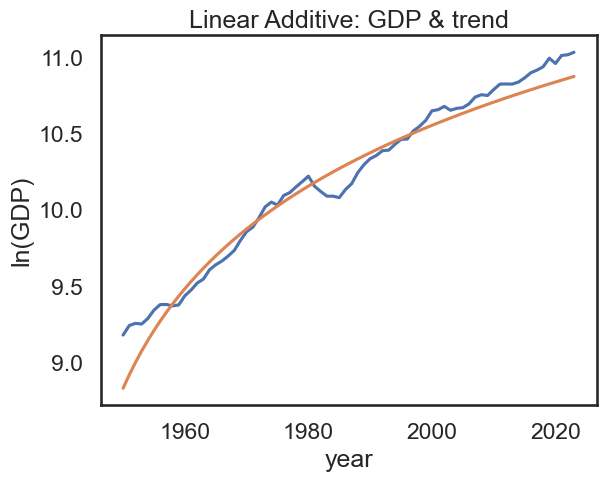

In [8]:
lw = 4

# since this program has only calculated one of the four trends, it can only plot one. But you have to think carefully 
# on how to present the results when you have calculated all four

plt.figure()
#one could add options such as a particular size and use instead
#plt.figure(figsize=(7, 5))
plt.plot(data['year'],np.log(data['rgdpe_pc']))
plt.plot(data['year'],yhat_add_lin)

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Linear Additive: GDP & trend")

